In [23]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt

In [24]:
# Authenticating Twitter APIs

consumerKey = 'APP API KEY'
consumerSecret = 'SECRET APP API KEY'
accessToken = 'ACCESS TOKEN KEY'
accessTokenSecret = 'SECRET ACCESS TOKEN KEY'


auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [57]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Enter the Keyword: ")

TweetNum = 1000
n = 5
# or we can enter the tweet count
# TweetNum = int(input())


tweets = tweepy.Cursor(api.search, q=keyword).items(TweetNum)

positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neu_list = []
neg_list = []
pos_list = []


for tweet in tweets:
    tweetText = tweet.text
    tweet_list.append(tweetText)
    
    analysis = TextBlob(tweet.text)
    asp = analysis.sentiment.polarity
    polarity += asp
    

    if (asp == 0):
        neutral += 1
        neu_list.append(tweetText)

    
    elif (asp < 0.00):
        negative += 1
        neg_list.append(tweetText)
        
       
    
    elif (asp > 0.00):
        positive += 1
        pos_list.append(tweetText)
        
print("Done!")

Enter the Keyword: btsarmy
Done!


In [58]:
# Output in text format

positive = percentage(positive, TweetNum)
negative = percentage(negative, TweetNum)
neutral = percentage(neutral, TweetNum)
polarity = percentage(polarity, TweetNum)

positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

print("Total number:",len(tweet_list))
print("Positive number:",len(pos_list))
print("Negative number:", len(neg_list))
print("Neutral number:",len(neu_list))

if positive>neu and positive>negative:
    t = "Postive"
elif negative>positive and negative>neutral:
    t = "Negative"
else:
    t = "Neutral"
    
print("\nThe Sentiment associated with ",keyword," is mostly ",t,sep = "\"",end="\".\n")
print("Positive:",str(positive)+"%","\nNegative:",str(negative)+"%","\nNeutral:",str(neutral)+"%")

Total number: 1000
Positive number: 542
Negative number: 211
Neutral number: 247

The Sentiment associated with "btsarmy" is mostly "Postive".
Positive: 54.2% 
Negative: 21.1% 
Neutral: 24.7%


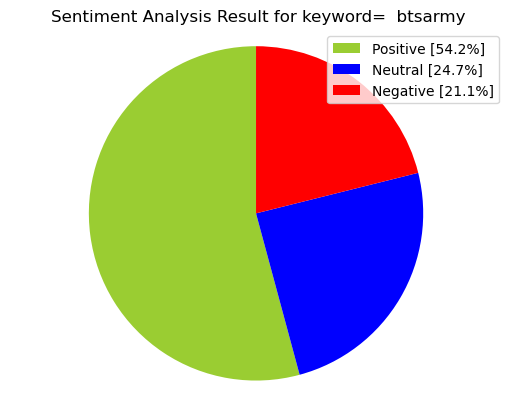

In [59]:
# Output in piechart format

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()